# INEP - Remuneração Média dos Docentes

Remuneração média dos docentes em exercício na educação básica por escolaridade - 2020

### 1. Leitura do arquivo

Utilizando o método adequado para carregar o arquivo Excel, como pd.read_excel, tratando valores faltantes ou inconsistentes e renomeando os nomes das colunas.

In [1]:
import pandas as pd

dados = pd.read_excel('datasets/Remuneracao_docentes_Brasil_2020.xlsx', skiprows=8)

dados = dados.rename(columns={
    "NU_ANO_CENSO": "Ano",
    "NO_CODIGO": "Abrangência",
    "DEPENDENCIA": "Dependência administrativa",
    "Escolaridade": "Escolaridade do docente",
    "n_censo": "Número de docentes Censo Escolar¹",
    "localizados": "% de docentes localizados² na RAIS",
    "quartil_1": "1º quartil",
    "mediana": "Mediana",
    "media": "Média5",
    "quartil3": "3º quartil",
    "desvio_padrao": "Desvio padrão",
    "media": "Média5",
    "carga_media": "Carga horária média semanal6",
    "rem_40_horas": "Remuneração média padronizada para 40h semanais7 em R$"
})

dados = dados.dropna(subset=["Dependência administrativa", "Escolaridade do docente", "Média5"])

dados

,Ano,Abrangência,Dependência administrativa,Escolaridade do docente,Número de docentes Censo Escolar¹,% de docentes localizados² na RAIS,1º quartil,Mediana,Média5,3º quartil,Desvio padrão,Carga horária média semanal6,Remuneração média padronizada para 40h semanais7 em R$
0,2020,Brasil,Federal,Total,37038.0,90.37475,9777.780,12783.450,12842.940,17283.23,5027.542,39.58505,12977.570
1,2020,Brasil,Federal,Superior,36587.0,90.63055,9847.260,12783.450,12874.380,17283.23,5016.798,39.58875,13008.120
2,2020,Brasil,Federal,Sem superior,451.0,69.62306,4426.640,9568.396,9363.702,12781.34,5000.314,39.17569,9560.728
3,2020,Brasil,Estadual,Total,655402.0,97.54685,2244.120,3116.770,3625.783,4533.45,2040.053,29.31977,4946.537
4,2020,Brasil,Estadual,Superior,633737.0,97.75285,2279.480,3151.710,3663.242,4580.55,2045.089,29.28635,5003.344
5,2020,Brasil,Estadual,Sem superior,21665.0,91.52089,1504.620,2023.340,2366.300,2987.95,1355.220,30.44365,3109.088
6,2020,Brasil,Municipal,Total,1209591.0,92.52508,2288.482,3171.850,3580.329,4421.51,1885.184,29.24719,4896.647
7,2020,Brasil,Municipal,Superior,1040149.0,95.07811,2406.300,3284.860,3702.717,4544.51,1895.167,29.18064,5075.581
8,2020,Brasil,Municipal,Sem superior,169442.0,76.85285,1505.600,2226.910,2568.728,3217.03,1447.357,29.79728,3448.272
9,2020,Brasil,Privada,Total,552610.0,71.34887,1239.260,1810.710,2486.165,2959.91,2130.178,28.13770,3534.282


### 2. Análise inicial com info() e describe()

Interpretando as saídas para entender a estrutura e os dados.

In [2]:
print(dados.info())

print(dados.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Ano                                                     15 non-null     object 
 1   Abrangência                                             15 non-null     object 
 2   Dependência administrativa                              15 non-null     object 
 3   Escolaridade do docente                                 15 non-null     object 
 4   Número de docentes Censo Escolar¹                       15 non-null     float64
 5   % de docentes localizados² na RAIS                      15 non-null     float64
 6   1º quartil                                              15 non-null     float64
 7   Mediana                                                 15 non-null     float64
 8   Média5                                         

### 3. Seleção de atributos relevantes e tratamento de valores faltantes

Filtrando os dados para focar nas colunas e categorias necessárias.

In [3]:
dados_relevantes = dados[["Dependência administrativa", "Escolaridade do docente", "Média5"]]

dados_relevantes = dados_relevantes.dropna()

dados_relevantes

,Dependência administrativa,Escolaridade do docente,Média5
0,Federal,Total,12842.940
1,Federal,Superior,12874.380
2,Federal,Sem superior,9363.702
3,Estadual,Total,3625.783
4,Estadual,Superior,3663.242
5,Estadual,Sem superior,2366.300
6,Municipal,Total,3580.329
7,Municipal,Superior,3702.717
8,Municipal,Sem superior,2568.728
9,Privada,Total,2486.165


### 4. Agregação com groupby

Agrupando os dados por dependência administrativa e escolaridade, calculando a média salarial.

In [4]:
media_salarial = dados_relevantes.groupby(
    ["Dependência administrativa", "Escolaridade do docente"]
)["Média5"].mean().reset_index()

print(media_salarial)

   Dependência administrativa Escolaridade do docente     Média5
0                    Estadual            Sem superior   2366.300
1                    Estadual                Superior   3663.242
2                    Estadual                   Total   3625.783
3                     Federal            Sem superior   9363.702
4                     Federal                Superior  12874.380
5                     Federal                   Total  12842.940
6                   Municipal            Sem superior   2568.728
7                   Municipal                Superior   3702.717
8                   Municipal                   Total   3580.329
9                     Privada            Sem superior   1604.535
10                    Privada                Superior   2672.561
11                    Privada                   Total   2486.165
12                    Pública            Sem superior   2554.814
13                    Pública                Superior   3859.774
14                    Púb

### 5. Visualização dos dados

Criando gráficos para visualizar as médias salariais.

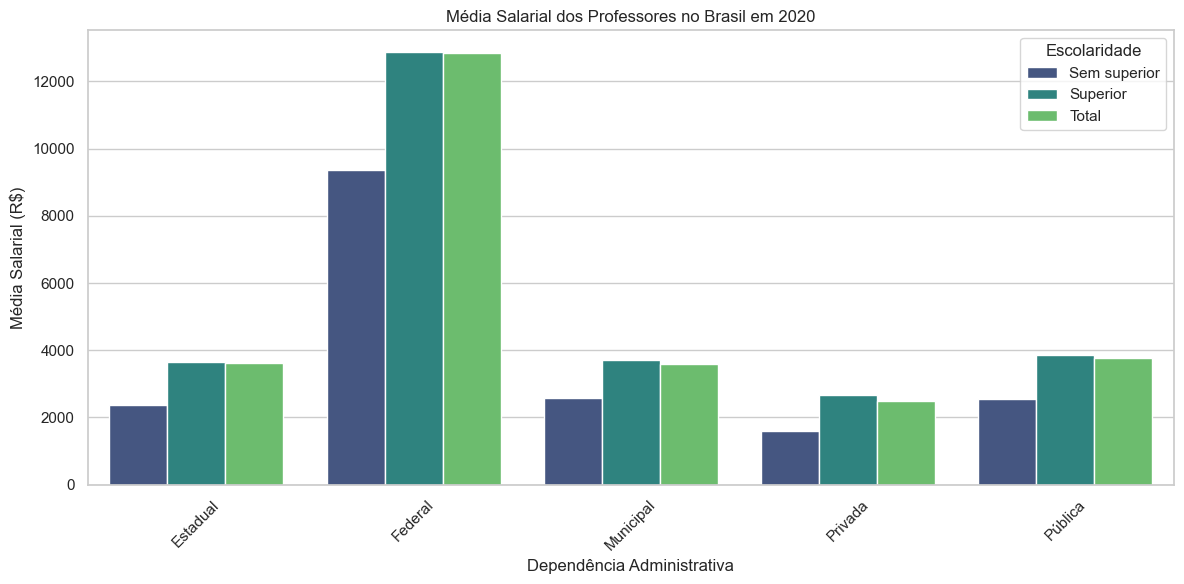

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=media_salarial,
    x="Dependência administrativa",
    y="Média5",
    hue="Escolaridade do docente",
    palette="viridis"
)
plt.title("Média Salarial dos Professores no Brasil em 2020")
plt.xlabel("Dependência Administrativa")
plt.ylabel("Média Salarial (R$)")
plt.xticks(rotation=45)
plt.legend(title="Escolaridade")
plt.tight_layout()
plt.show()

### 6. Exportando dados 

In [11]:
media_salarial.to_csv('media_salarial.csv', sep=';', decimal=',')